In [1]:
# ===========================
# Import required libraries
# ===========================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
import warnings
import math
import os

In [2]:
# ===========================
# LOAD MERGE DATASETS
# ===========================
df = pd.read_csv("C:/Users/khuep/Downloads/YEN/UNITS/HIT140/Assessment 3/merged_datasets_wrangle.csv")

===== INFERENTIAL ANALYSIS: ASSESSMENT 2 (Investigation A) =====
[Chi-square] Risk vs Rat presence: chi2=4.015, p=0.0451


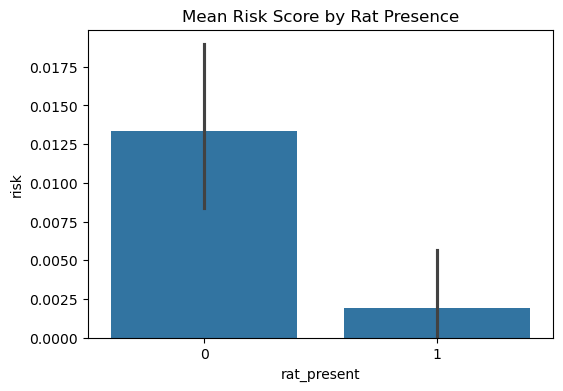

[T-test] Hesitation vs Rat: t=nan, p=nan


c:\Users\khuep\anaconda3\envs\hit140env_student\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


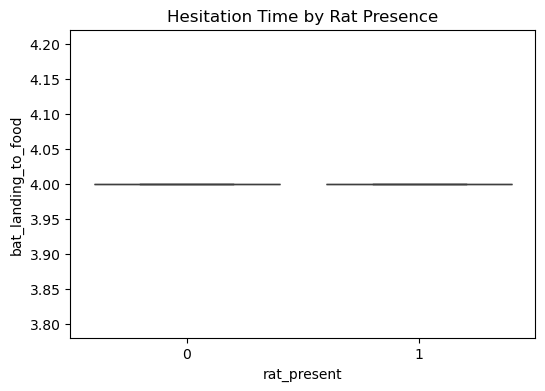


[Logistic regression: risk ~ rat_present]
                           Logit Regression Results                           
Dep. Variable:                   risk   No. Observations:                 2322
Model:                          Logit   Df Residuals:                     2320
Method:                           MLE   Df Model:                            1
Date:                Thu, 16 Oct 2025   Pseudo R-squ.:                 0.02526
Time:                        00:27:58   Log-Likelihood:                -134.66
converged:                       True   LL-Null:                       -138.15
Covariance Type:            nonrobust   LLR p-value:                  0.008246
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.3012      0.206    -20.930      0.000      -4.704      -3.898
rat_present    -1.9641      1.022     -1.922      0.055      -3.967       0.039

====

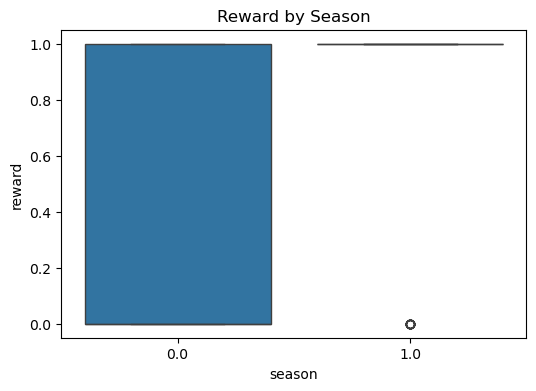

In [3]:
# ===========================
# 8. INFERENTIAL ANALYSIS
# ===========================
# --- Assessment 2 (Investigation A Recap) ---
def inferential_A(df):
    print("===== INFERENTIAL ANALYSIS: ASSESSMENT 2 (Investigation A) =====")

    # Chi-square test
    contingency = pd.crosstab(df["risk"], df["rat_present"])
    chi2,p,_,_ = stats.chi2_contingency(contingency)
    print(f"[Chi-square] Risk vs Rat presence: chi2={chi2:.3f}, p={p:.4f}")
    
    plt.figure(figsize=(6,4))
    sns.barplot(x="rat_present", y="risk", data=df, errorbar=('ci', 95))
    plt.title("Mean Risk Score by Rat Presence"); plt.show()


    # T-test
    if "bat_landing_to_food" in df.columns:
        g0 = df[df["rat_present"]==0]["bat_landing_to_food"].dropna()
        g1 = df[df["rat_present"]==1]["bat_landing_to_food"].dropna()
        t, pval = stats.ttest_ind(g0, g1, equal_var=False)
        print(f"[T-test] Hesitation vs Rat: t={t:.3f}, p={pval:.4f}")
        plt.figure(figsize=(6,4))
        sns.boxplot(x="rat_present", y="bat_landing_to_food", data=df)
        plt.title("Hesitation Time by Rat Presence")
        plt.show()


    # Logistic regression
    formula = "risk ~ rat_present"
    logit_model = smf.logit(formula, data=df).fit(disp=0)
    print("\n[Logistic regression: risk ~ rat_present]")
    print(logit_model.summary())


# --- Assessment 3 (Investigation B + Moon) ---
def inferential_B(df):
    print("\n===== INFERENTIAL ANALYSIS: ASSESSMENT 3 (Investigation B + Moon) =====")

    # ANOVA reward ~ season
    if "reward" in df.columns and "season" in df.columns:
        ols_model = smf.ols("reward ~ C(season)", data=df).fit()
        print("\n[ANOVA] reward ~ season")
        print(anova_lm(ols_model))
        plt.figure(figsize=(6,4))
        sns.boxplot(x="season", y="reward", data=df)
        plt.title("Reward by Season")
        plt.show()

    # OLS rat arrivals ~ season + sunset
    if {"rat_arrival_number","hours_after_sunset"}.issubset(df.columns):
        rats_model = smf.ols("rat_arrival_number ~ C(season) + hours_after_sunset", data=df).fit()
        print("\n[OLS] rat_arrival_number ~ season + hours_after_sunset")
        print(anova_lm(rats_model))

        plt.figure(figsize=(7,5))
        sns.scatterplot(x="hours_after_sunset", y="rat_arrival_number", hue="season", data=df, alpha=0.6)
        plt.title("Rat Arrivals vs Hours After Sunset by Season")
        plt.xlabel("Hours After Sunset")
        plt.ylabel("Rat Arrival Number")
        plt.legend(title="Season", bbox_to_anchor=(1.05,1), loc="upper left")
        plt.tight_layout()
        plt.show()

    # Correlation moon ~ hesitation
    if {"moon_illumination","bat_landing_to_food"}.issubset(df.columns):
        r,p = stats.pearsonr(df["moon_illumination"], df["bat_landing_to_food"])
        print(f"\n[Correlation] Moon illumination vs Hesitation: r={r:.3f}, p={p:.4f}")

        plt.figure(figsize=(6,4))
        sns.regplot(
        x="moon_illumination", 
        y="bat_landing_to_food", 
        data=df, 
        scatter_kws={"alpha":0.5}
    )
        plt.title("Hesitation vs Moon Illumination")
        plt.xlabel("Moon Illumination")
        plt.ylabel("Hesitation (bat_landing_to_food)")
        plt.show()


    # OLS vigilance ~ season + rat + moon
    if "vigilance_index" in df.columns and "moon_illumination" in df.columns:
        ols_vig = smf.ols("vigilance_index ~ C(season) + rat_present + moon_illumination", data=df).fit()
        print("\n[OLS] vigilance_index ~ season + rat_present + moon")
        print(anova_lm(ols_vig))
        plt.figure(figsize=(7,5))
        sns.boxplot(x="season", y="vigilance_index", hue="rat_present", data=df)
        plt.title("Vigilance Index by Season and Rat Presence")
        plt.show()


inferential_A(df)
inferential_B(df)

